<a href="https://colab.research.google.com/github/bhattronak1/Watson-studio/blob/master/Copy_of_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (4.2.0)


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
import logging
logger= tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata= tfds.load('fashion_mnist', as_supervised= True, with_info= True)
train_data, test_data= dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names= metadata.features['label'].names
print('Class Names: {}'. format(class_names))

Class Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples= metadata.splits['train'].num_examples
num_test_examples= metadata.splits['test'].num_examples
print('Number of train examples: {}'.format(num_train_examples))
print('Number of test examples: {}'. format(num_test_examples))

Number of train examples: 60000
Number of test examples: 10000


In [ ]:
def normalize(images,labels):
  images= tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_data= train_data.map(normalize)
test_data=test_data.map(normalize)

train_data= train_data.cache()
test_data= test_data.cache()


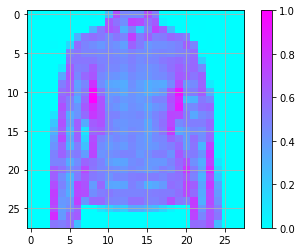

In [ ]:
for images, label in test_data.take(1):
  break

images = images.numpy().reshape((28,28))

plt.figure()
plt.imshow(images)
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
model= tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy()
              metrics=['accuracy'])

SyntaxError: ignored